# Hydrology
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/DHI/tsod/blob/main/notebooks/SMHI_hydrology.ipynb)

We will take a look at some data from [SMHI hydrological station network](https://vattenwebb.smhi.se/station/)

In [11]:
# if you run this on Colab, don't forget to install tsod first
# pip install tsod # from PyPI
# pip install https://github.com/DHI/tsod/archive/main.zip # dev version

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Råån / Bröddebacken (station 2127)

In [2]:
url = "https://vattenwebb.smhi.se/station/rest/report/2127"

raw_df = pd.read_excel(url,skiprows=13, names=["date","flow","quality"])


In [3]:
df = raw_df.copy()
df = df.drop('date',axis=1)
df.index = pd.to_datetime(raw_df['date'])

In [4]:
df.head()

flow       quality
date                           
1973-05-18  0.437  Kontrollerat
1973-05-19  0.437  Kontrollerat
1973-05-20  0.437  Kontrollerat
1973-05-21  0.406  Kontrollerat
1973-05-22  0.373  Kontrollerat

<AxesSubplot:ylabel='Frequency'>

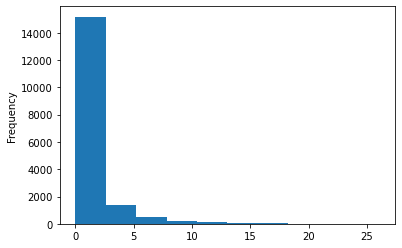

In [5]:
df.flow.plot.hist()

<AxesSubplot:xlabel='date'>

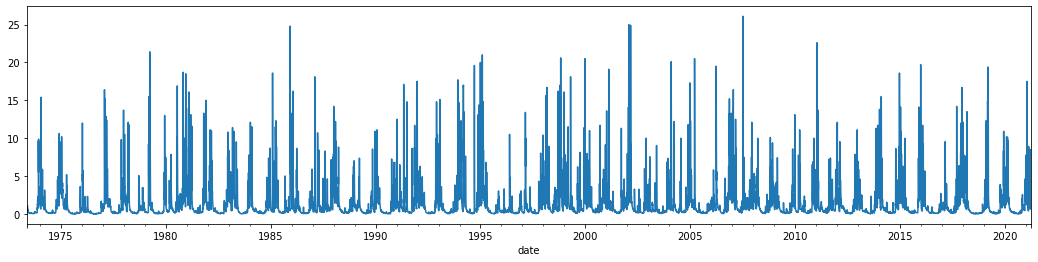

In [6]:
df.flow.plot(figsize=(18,4))

# Rangedetector

In [7]:
import plotly.graph_objects as go
from tsod.detectors import RangeDetector

rd = RangeDetector(min_value=0.0,max_value=20.0)
anom = rd.detect(df.flow)


data = [
    go.Scatter(go.Scatter(x=df.index, y=df.flow, mode='markers+lines'), name="Flow"),
    go.Scatter(go.Scatter(x=df[anom].index, y=df[anom].flow, mode='markers', name='Anomalies')),
    ]
fig = go.Figure(data=data, layout=go.Layout(width=1000))
fig.show() 

In [8]:
df = df.resample('D').first()
df.index.freq

<Day>

In [10]:
from tsod.detectors import DiffDetector

drd = DiffDetector(10.0) # a change of 10 m^3/s from day to day is questionable

#drd.fit(df['1980']['flow']) # find parameters from a normal dataset

In [12]:
anom = drd.detect(df['flow'])

In [13]:
data = [
    go.Scatter(go.Scatter(x=df.index, y=df.flow, mode='markers+lines'), name="Flow"),
    go.Scatter(go.Scatter(x=df[anom].index, y=df[anom].flow, mode='markers', name='Anomalies')),
    ]
fig = go.Figure(data=data, layout=go.Layout(width=1000))
fig.show() 

## Seasonality

In [14]:
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month

In [15]:
df.head()

flow       quality  dayofyear  year  month
date                                                   
1973-05-18  0.437  Kontrollerat        138  1973      5
1973-05-19  0.437  Kontrollerat        139  1973      5
1973-05-20  0.437  Kontrollerat        140  1973      5
1973-05-21  0.406  Kontrollerat        141  1973      5
1973-05-22  0.373  Kontrollerat        142  1973      5

<AxesSubplot:xlabel='dayofyear', ylabel='flow'>

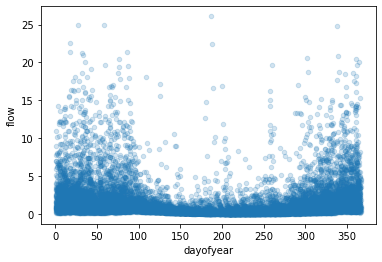

In [16]:
df.plot.scatter(x='dayofyear',y='flow',alpha=0.2)

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='month', ylabel='flow'>

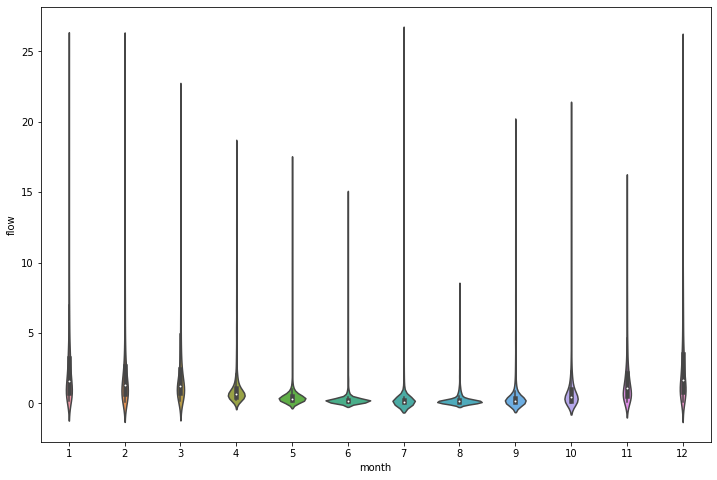

In [18]:
plt.figure(figsize=(12,8))
sns.violinplot(x="month",y="flow", data=df)

<AxesSubplot:xlabel='month', ylabel='flow'>

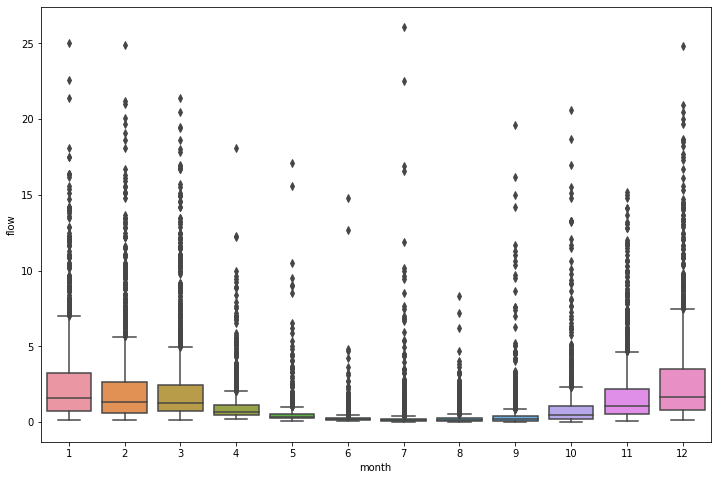

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x="month",y="flow", data=df)

# Stations in vicinity

River discharge temporal patterns should be similar in neighbouring water bodies.

## Vege å / Åbromölla (station 2196)

In [20]:
url = "https://vattenwebb.smhi.se/station/rest/report/2196"

raw_df = pd.read_excel(url,skiprows=13, names=["date","flow","quality"])

In [21]:
raw_df.head()

date   flow       quality
0  1976-12-10  1.480  Kontrollerat
1  1976-12-11  1.590  Kontrollerat
2  1976-12-12  1.320  Kontrollerat
3  1976-12-13  1.130  Kontrollerat
4  1976-12-14  0.937  Kontrollerat

In [22]:
df2 = raw_df.copy()
df2.index = pd.to_datetime(raw_df['date'])
df2 = df2.drop('date',axis=1)

In [23]:
df2.head()

flow       quality
date                           
1976-12-10  1.480  Kontrollerat
1976-12-11  1.590  Kontrollerat
1976-12-12  1.320  Kontrollerat
1976-12-13  1.130  Kontrollerat
1976-12-14  0.937  Kontrollerat

In [24]:
sel = slice('2019','2020')
data = [
    go.Scatter(go.Scatter(x=df[sel].index, y=df[sel].flow, name="Råån")),
    go.Scatter(go.Scatter(x=df2[sel].index, y=df2[sel].flow, name="Vege å")),
    ]
fig = go.Figure(data=data, layout=go.Layout(width=1000))
fig.show() 

It is apparent that these two timeseries are highly correlated. This information can be utilized by a Multivariate timeseries anomaly detector. To be implemented...